In [8]:
!pip3 install TensorFlow

     |████████████████████████████████| 165.2 MB 52.0 MB/s eta 0:00:01    |██████████▊                     | 55.1 MB 99.0 MB/s eta 0:00:02     |█████████████████████████▉      | 133.2 MB 13.6 MB/s eta 0:00:03
     |████████████████████████████████| 57 kB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 40.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 30.2 MB/s eta 0:00:01     |█████████████████████▊          | 2.5 MB 30.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 36.4 MB/s eta 0:00:01
     |████████████████████████████████| 459 kB 41.5 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 8.0 MB/s  eta 0:00:01
     |████████████████████████████████| 10.6 MB 48.6 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 45.5 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 3.8 MB/s  eta 0:00:01
     |████████████████████████████████| 779 kB 17.2 MB/s eta 0:00:01
     |█████████████████████████████

In [9]:
import yfinance as yf 
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [170]:
def historical_graph(stock_code, start, end):
    df = web.DataReader(stock_code, data_source="yahoo", start=start, end=end)
    plt.figure(figsize=(16,8))
    plt.title(f"{stock_code} Closing Price")
    plt.plot(df["Close"])
    plt.xlabel("Date", fontsize = 18)
    plt.ylabel("Close Price USD ($)", fontsize = 18)

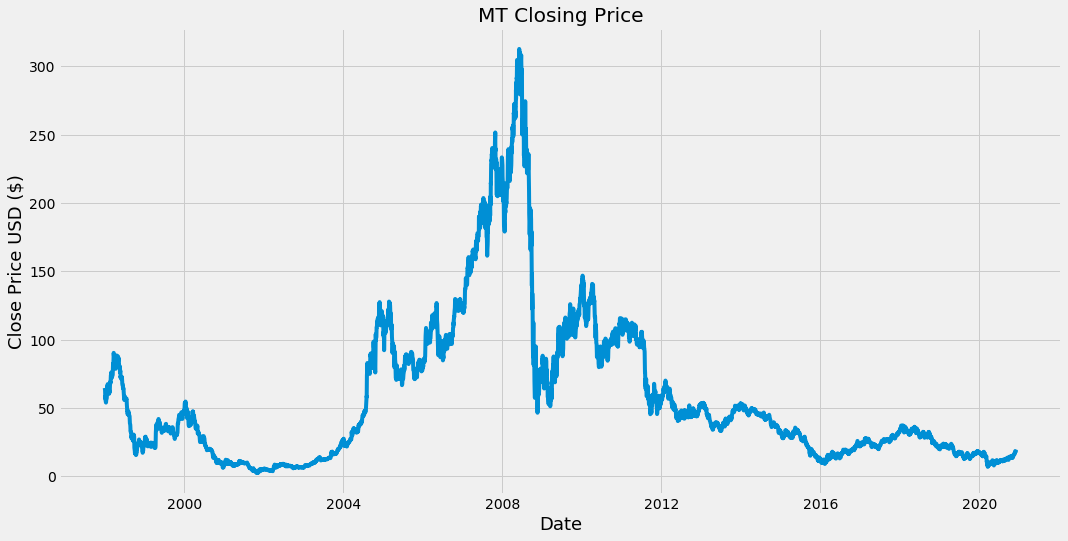

In [173]:
historical_graph("MT", "1998-01-01", "2020-12-01")

In [168]:
df = web.DataReader("AAPL", data_source="yahoo", start="2012-01-01", end="2019-12-17")


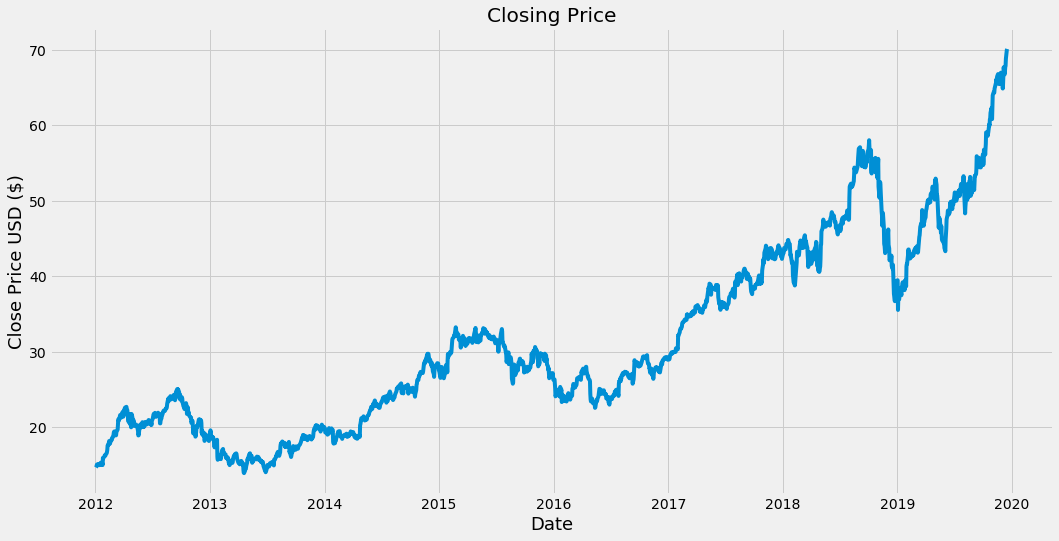

In [208]:
plt.figure(figsize=(16,8))
plt.title("Closing Price")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price USD ($)", fontsize = 18);


In [137]:
data = df.filter(["Close"])

Creamos un DataFrame que sea solo la columna de Close

In [138]:
data

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765715
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2019-12-11,67.692497
2019-12-12,67.864998
2019-12-13,68.787498


Lo pasamos a array

In [139]:
dataset = data.values

In [140]:
dataset

array([[14.6867857 ],
       [14.76571465],
       [14.92964268],
       ...,
       [68.78749847],
       [69.96499634],
       [70.10250092]])

In [141]:
training_data_len = math.ceil(len(dataset)*.8)

In [142]:
training_data_len

1603

Scale the data

In [143]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

Training scaled datasete

In [145]:
train_data = scaled_data[0:training_data_len, :]

Dividimos el train en X y Y, variables predictivas y variable a predecir

In [146]:
x_train = []
y_train = []

for i in range(60, len(train_data)): 
    x_train.append(train_data[i-60:i, 0]) #Los valores de 1 a 60
    y_train.append(train_data[i, 0]) #Contiene el valor 61 -> valor a predecir
    if i <= 61:
        print(x_train)
        print(y_train)

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]
[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.018

In [147]:
x_train, y_train = np.array(x_train), np.array(y_train)

LSTM expects the data to be three dimensional and right now is two dimensional

In [148]:
x_train.shape

(1543, 60)

In [149]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [150]:
x_train.shape

(1543, 60, 1)

BUILD THE LSTM MODEL

In [151]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [152]:
model.compile(optimizer = "adam", loss="mean_squared_error")
#Optimizer is used to improve upon the loss function y el loss es la métrica. 

In [153]:
#Entrenamos el model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1543/1543 [==============================] - 43s 28ms/step - loss: 8.8248e-04


Ahora creamos el test set

In [207]:
test_data = scaled_data[training_data_len - 60: , :]

In [155]:
x_test = []
y_test = dataset[training_data_len:, :] #Valores que queremos que prediga nuestro modelo
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [156]:
x_test = np.array(x_test) #Para poder usarlo en el LSTM

In [157]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

Let´s get the models predicted values 

In [158]:
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions) #Unscaling the values
#Queremos que las predicciones tengan los mismos valores que nuestro y_test

Evaluamos el modelo con el MSE o el RMSE. Deberíamos usar otras métricas también

In [159]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1.4889717087131609

Let´s Plot the data

In [160]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

<ipython-input-160-3a5332c8fc41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


In [164]:
train = data[:training_data_len]
valid = data[training_data_len:]

In [165]:
valid["Predictions"] = predictions

<ipython-input-165-0f631b31cbfc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


In [166]:
type(valid)

pandas.core.frame.DataFrame

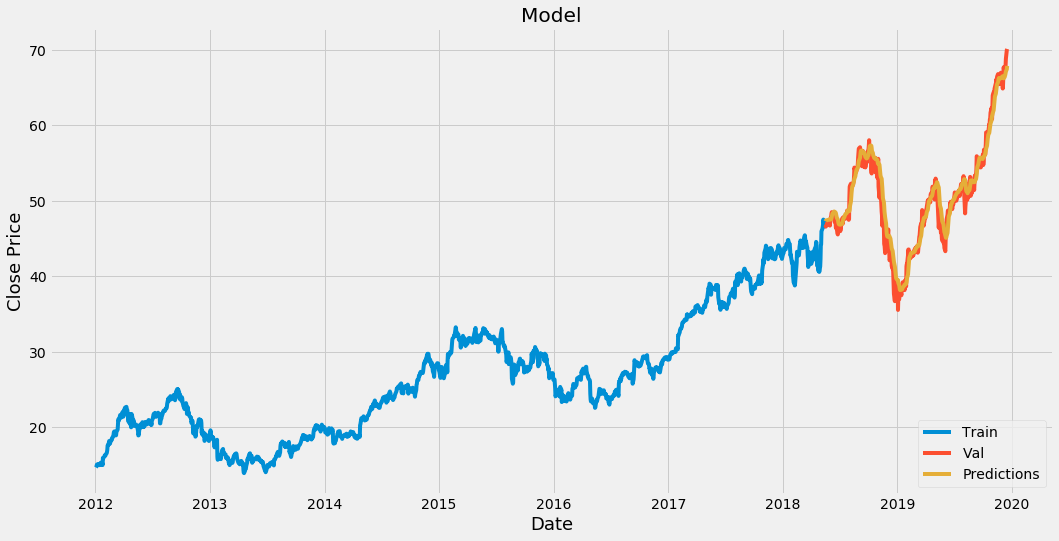

In [167]:
plt.figure(figsize = (16,8))
plt.title("Model")
plt.xlabel("Date", fontsize =  18)
plt.ylabel("Close Price", fontsize = 18)
plt.plot(a["Close"])
plt.plot(b[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc = "lower right")
plt.show()

In [174]:
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,47.289169
2018-05-18,46.577499,47.389393
2018-05-21,46.907501,47.415020
2018-05-22,46.790001,47.432053
2018-05-23,47.090000,47.429237
...,...,...
2019-12-11,67.692497,66.665833
2019-12-12,67.864998,66.876137
2019-12-13,68.787498,67.106033


Ahora vamos a predecir el precio para un día en concreto

In [182]:
apple_quote = web.DataReader("AAPL", data_source="yahoo", start="2012-01-01", end="2019-12-17")
#Lo pasamos a dataframe
new_df = apple_quote.filter(["Close"])
#Sacamos los últimos 60 días
last_60_days = new_df[-60:].values 
#Escalamos los datos del array que acabamos de crear
last_60_days_scaled = scaler.transform(last_60_days)
#Creamos una lista vacía
X_test = []
#Le añadimos los valores de los 60 días
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Sacar la predicción
pred_price = model.predict(X_test)
#Undo de scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[68.323616]]


In [186]:
apple_quote2 = web.DataReader("AAPL", data_source="yahoo", start="2019-12-17", end="2019-12-17")
print(apple_quote2["Close"])

Date
2019-12-17    70.102501
Name: Close, dtype: float64


Pero claro esto está predeciendo como estará el stock al día siguiente, sabiendo los 60 días anteriores. Comete un error bastante parecido al que cometeríamos si simplemente dijéramos que el stock se mantiene en el mismo precio. Como la gráfica de las predicciones está con un zoom muy grande, parece que el trabajo que hace es estupendo, cuando en realidad lo que está haciendo aporta un valor escaso o nulo a la hora de invertir. 

Pero no seamos desconfiados, vamos a ver que valor aporta nuestro modelo si le decimos, ¿Como estará este stock dentro de un mes?, ¿Como será su error en estos casos?, veamos: 

https://towardsdatascience.com/quit-trying-to-predict-the-market-27d77149a709

In [193]:
apple_quote3 = web.DataReader("AAPL", data_source="yahoo", start="2012-01-01", end="2019-12-17")
df2 = apple_quote.filter(["Close"])
#En vez de coger los últimos 60 días, cojamos los últimos 200 para darle un mejor insight a nuestro modelo
last_200_days = df2[-60:].values 
#Los escalamos 
last_200_days_scaled = scaler.transform(last_200_days)